# Actividad 1
-----------------------

Alumno: Gonzalo Antonio Delgado Rubio
Curso: 06MBID_04_B_2024-25_Estadística avanzada

Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)



| Atributo Ingles      | Atributo Español       | Significado                                          |
|-----------------------------|-----------------------------|------------------------------------------------------------|
| Claim                       | Estado del reclamo           | Claim Status                                               |
| Agency                      | Nombre de la agencia         | Agency Name                                                |
| Agency Type                 | Tipo de agencias de seguros  | Type of Insurance Agency                                   |
| Distribution Channel        | Canal de distribución        | Distribution Channel of Insurance Agency                    |
| Product Name                | Nombre de los productos      | Name of the Insurance Product                              |
| Duration                    | Duración del viaje           | Duration of the Trip                                       |
| Destination                 | Destino del viaje            | Destination of the Trip                                    |
| Net Sales                   | Monto de ventas              | Net Sales of Insurance Policies                            |
| Commision (in value)        | Comisión recibida            | Commission Received by Insurance Agency                     |
| Gender                      | Género del asegurado         | Gender of the Insured                                      |
| Age                         | Edad del asegurado           | Age of the Insured                                         |


URL DataSet:  https://www.kaggle.com/datasets/mhdzahier/travel-insurance/data

In [61]:
# Instalar y cargar las librerías necesarias
install.packages("caret")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("psych")
library(psych)
library(caret)
library(dplyr)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
# carga de dataset
df <- read.csv("dataset.csv")
head(df,1)

,ID,Age,Agency,Agency.Type,Commision..in.value.,Destination,Distribution.Channel,Duration,Gender,Net.Sales,Product.Name,Claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1


In [63]:
dim(df)

[1] 62288    12

## 1. Exploración de Datos

In [64]:
# Renombrar las columnas utilizando la función rename de dplyr

df <- df %>% rename(
  id = ID,
  age = Age,
  agency = Agency,
  agency_type = `Agency.Type`,
  commision = `Commision..in.value.`,
  destination = Destination,
  distribution_channel = `Distribution.Channel`,
  duration = Duration,
  gender = Gender,
  net_sales = `Net.Sales`,
  product_name = `Product.Name`,
  claim = Claim
)

# Mostrar las primeras 2 filas del DataFrame
head(df, 2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [65]:

# Obtener estadísticas descriptivas de todas las columnas
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,62288,3.284495e+04,1.806542e+04,33446.50,3.308708e+04,22892.826600,0,63323.00,63323.00,-0.09030053,-1.1633701,7.238454e+01
age,2,62288,3.966632e+01,1.401465e+01,36.00,3.769584e+01,7.413000,0,118.00,118.00,2.86558337,12.4269866,5.615393e-02
agency*,3,62288,7.200729e+00,2.674967e+00,8.00,7.164513e+00,1.482600,1,16.00,15.00,-0.07415869,0.3235035,1.071806e-02
agency_type*,4,62288,1.655279e+00,4.752811e-01,2.00,1.694092e+00,0.000000,1,2.00,1.00,-0.65340786,-1.5730834,1.904357e-03
commision,5,62288,1.282970e+01,2.349874e+01,1.88,7.235987e+00,2.787288,0,262.76,262.76,3.36748063,16.5153677,9.415480e-02
destination*,6,62288,6.090452e+01,2.849731e+01,73.00,6.311366e+01,23.721600,1,102.00,101.00,-0.60548286,-0.8625374,1.141831e-01
distribution_channel*,7,62288,1.982083e+00,1.326501e-01,2.00,2.000000e+00,0.000000,1,2.00,1.00,-7.26837803,50.8301352,5.315025e-04
duration,8,62288,6.095880e+01,1.143253e+02,25.00,3.532459e+01,26.686800,-2,4881.00,4883.00,14.86221447,555.5211229,4.580789e-01
gender*,9,62288,1.544920e+00,7.800916e-01,1.00,1.431169e+00,0.000000,1,3.00,2.00,0.98997324,-0.6451385,3.125672e-03


observamos valores negativos para duration y net_sales, de la misma forma age tiene un valor maximo de 118 que podría resultar atipico

Aqui tambien se aprecia que habría una gran cantidad de valores nulos para gender

### 2.1 Nulidad de Datos

In [66]:
# Calculate the count of null or empty values per field
porcentaje_nulos <- colSums(is.na(df) | df == "") / nrow(df) * 100
porcentaje_nulos

id                  age               agency 
             0.00000              0.00000              0.00000 
         agency_type            commision          destination 
             0.00000              0.00000              0.00000 
distribution_channel             duration               gender 
             0.00000              0.00000             63.53551 
           net_sales         product_name                claim 
             0.00000              0.00000              0.00000

observamos que variable gender tiene un 63.5% de valores nulos o vacio, se deberá evaluar si esta variable es relevante para los análisis futuros. A primera impresión podria parecer factible eliminarla

In [67]:
# Reemplazo string vacios por NA
df <- df %>%
  mutate(gender = ifelse(gender == "", NA, gender))

head(df,2)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


#### 2.3 Quitar Datos Considerados Errores

In [69]:
# Cantidad de datos con valores negativos
cat("Cantidad de datos negativos para net_sales:", sum(df$net_sales < 0), "\n")
cat("Cantidad de datos negativos para duration:", sum(df$duration < 0), "\n")

Cantidad de datos negativos para net_sales: 584 
Cantidad de datos negativos para duration: 4 


In [70]:
# Los datos se duración y net_sales con valores negativos deberian ser eliminados de nuestro dataset al considerarse como datos erroneos
df <- df[df$net_sales >= 0 & df$duration >= 0, ]
head(df)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
3,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,0
4,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,0
5,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,0
6,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,0


#### 2.2 Verificar la existencia de duplicados

In [71]:
# cantidad nulos
sum(is.na(df))

[1] 39095

In [72]:
# identificando duplicados
duplicate_columns <- df[duplicated(df), ]
duplicate_columns <- duplicate_columns[order(names(duplicate_columns))]
head(duplicate_columns, 5)

,age,agency,agency_type,claim,commision,destination,distribution_channel,duration,gender,id,net_sales,product_name
,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
291,44,LWC,Travel Agency,1,49.73,FRANCE,Online,31,M,56061,76.5,Single Trip Travel Protect Gold
386,36,EPX,Travel Agency,1,0.00,VIET NAM,Online,19,NA,36469,25.0,2 way Comprehensive Plan
553,25,C2B,Airlines,1,64.80,SINGAPORE,Online,366,F,44757,259.2,Annual Silver Plan
608,24,C2B,Airlines,1,103.00,SINGAPORE,Online,166,M,60771,412.0,Silver Plan
640,26,C2B,Airlines,1,64.80,SINGAPORE,Online,365,F,48460,259.2,Annual Silver Plan


In [73]:
# data sin duplicados
df_clean <- unique(df)
dim(df_clean)

[1] 50207    12

## 3. Analisis Exploratorio De los Datos

En este apartado nos encargaremos de realizar el análisis a las variables categoricas y numericas asi como a nuestro target para visualizar temas de balance

#### 3.1 Validando Distribución Clase Objetivo Claim

In [74]:
df_clean %>%
    group_by(claim) %>%
    summarise(count = n()) %>%
    mutate(proportion = round(count / nrow(df_clean), 4))

claim,count,proportion
<int>,<int>,<dbl>
0,49284,0.9816
1,923,0.0184


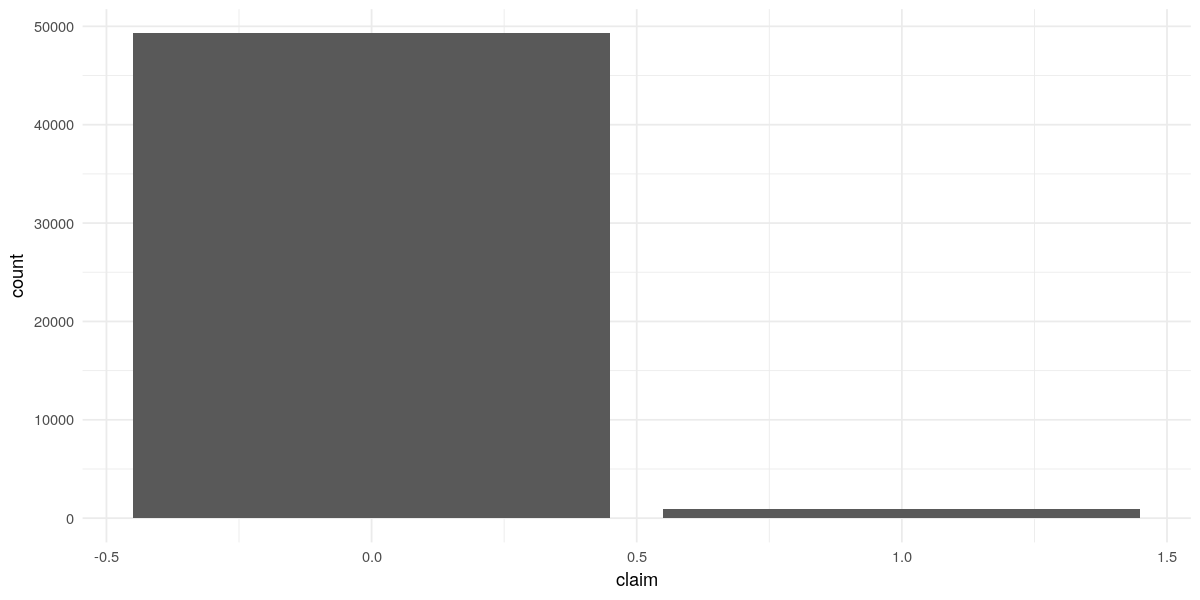

In [75]:
# grafico barras para clase target
ggplot(df_clean, aes(x = claim)) +
    geom_bar() +
    theme_minimal()

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.

In [76]:
head(df_clean,2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


### 3.2 Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [77]:
# Identificar variables numéricas
variables_numericas <- c('age', 'commision', 'duration', 'net_sales')

# Identificar variables categóricas  -- 'gender' no se incluye dado que se descartó en el análisis
variables_categoricas <- c('agency', 'agency_type', 'destination', 'distribution_channel', 'product_name', 'gender')

# Imprimir las listas
print("Variables numéricas:")
print(variables_numericas)
print("Variables categóricas:")
print(variables_categoricas)


[1] "Variables numéricas:"
[1] "age"       "commision" "duration"  "net_sales"
[1] "Variables categóricas:"
[1] "agency"               "agency_type"          "destination"         
[4] "distribution_channel" "product_name"         "gender"              


#### 3.2.1 Exploración atributos numericos

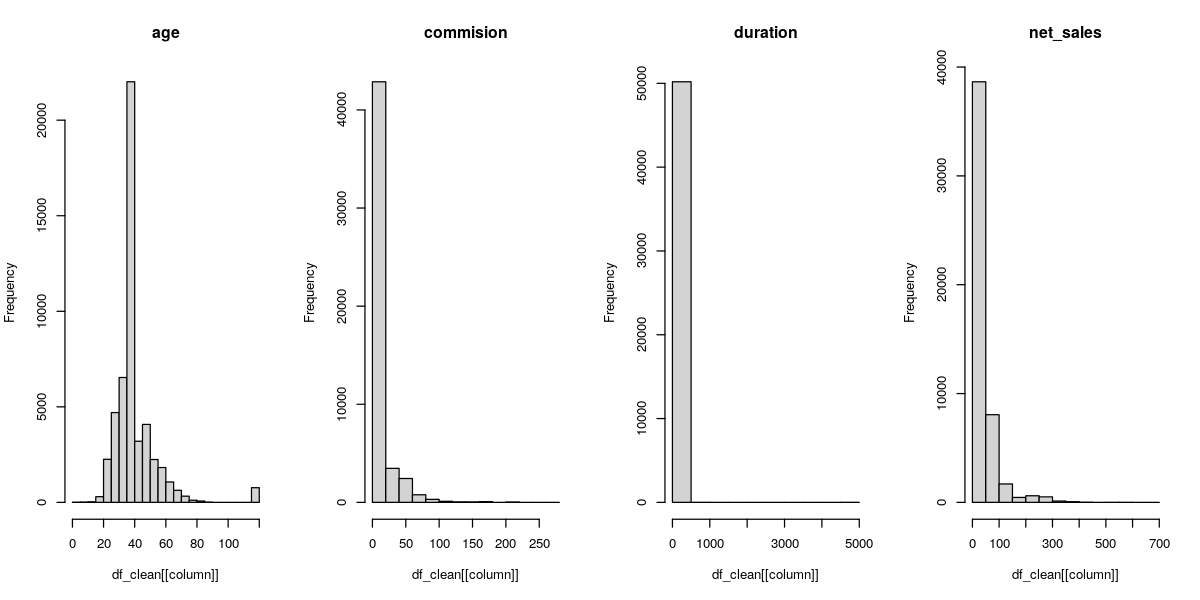

In [78]:
# Ampliar la salida de la imagen para Jupyter Notebook
options(repr.plot.width = 10, repr.plot.height = 5)

# Creando un histograma para cada variable numérica
par(mfrow = c(1, length(variables_numericas)))
for (column in variables_numericas) {
    hist(df_clean[[column]], main = column)
}


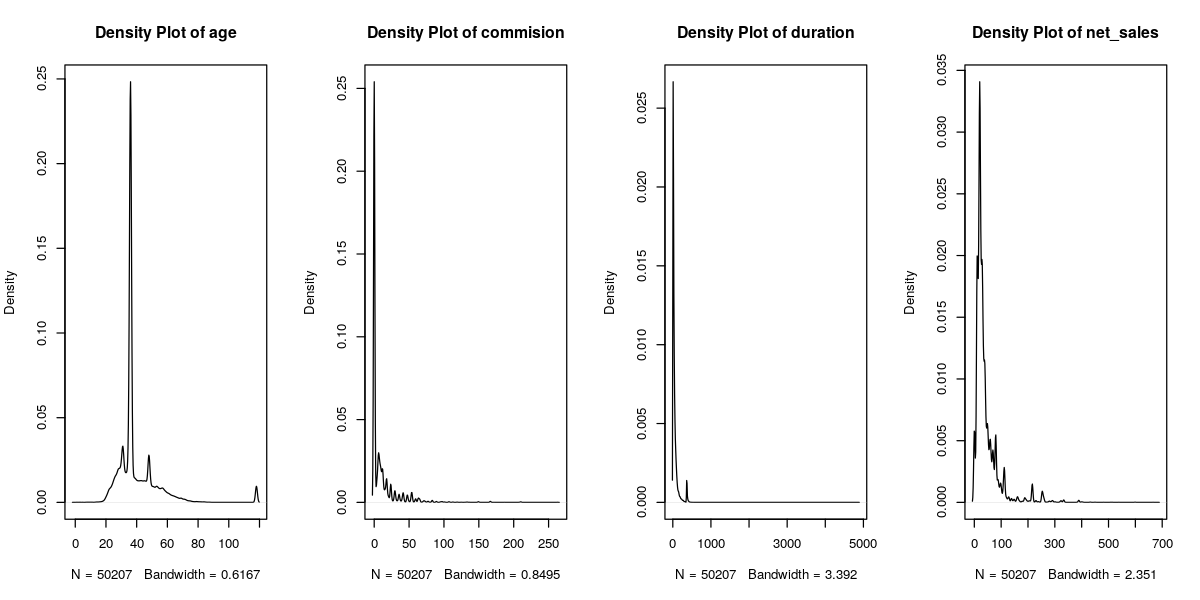

In [79]:
# Obteniendo gráficos de densidad para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    density_plot <- density(df_clean[[variables_numericas[i]]])
    plot(density_plot, main = paste("Density Plot of", variables_numericas[i]))
}

Observamos que para todas nuestras variables la data no se encontraría correctamente distribuida por lo que se entendería que existen muchos valores atipicos.

La variable que tendría mejor distribución seria el de edad

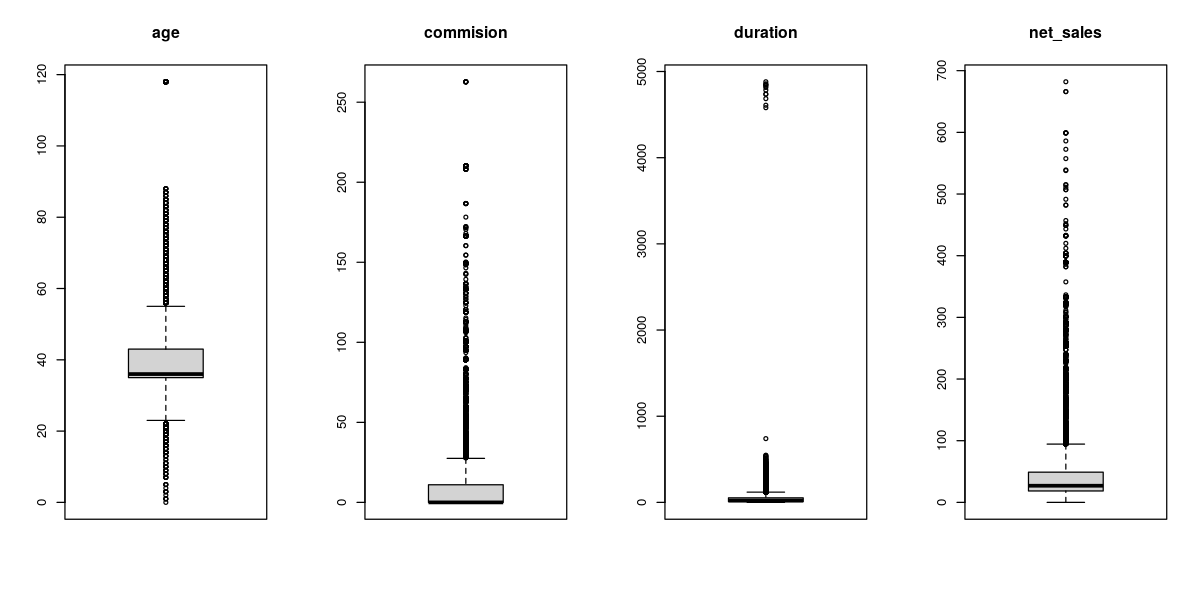

In [80]:
# Crear graficos de caja para atributos numericos
# Crear gráficos de caja para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    boxplot(df_clean[[variables_numericas[i]]], main = variables_numericas[i])
}

observamos datos fueras de dominio para todos atributos numericos, estos serán tratados más adelante

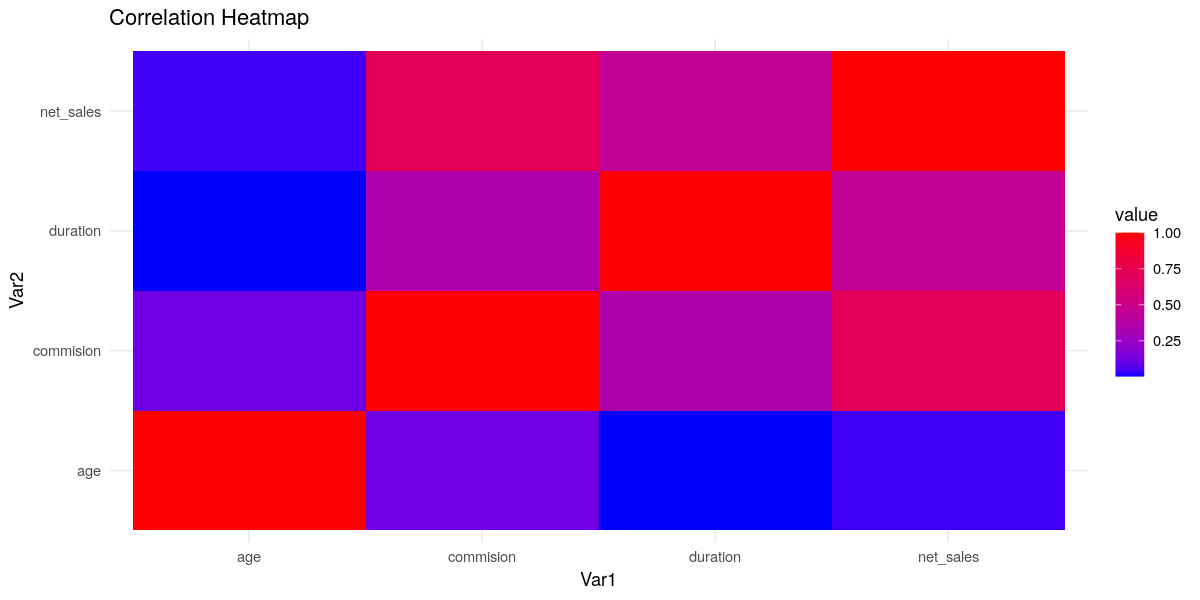

In [81]:
# generamos mapa de calor para conocer correlación entre las variables
library(ggplot2)
library(reshape2)

correlation_matrix <- cor(df_clean[variables_numericas])
melted_correlation <- melt(correlation_matrix)

ggplot(data = melted_correlation, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = "Correlation Heatmap") +
    theme_minimal()

observamos correlación positiva entre los datos de net_sales y commision

#### 3.2.2 Exploración atributos Categoricos

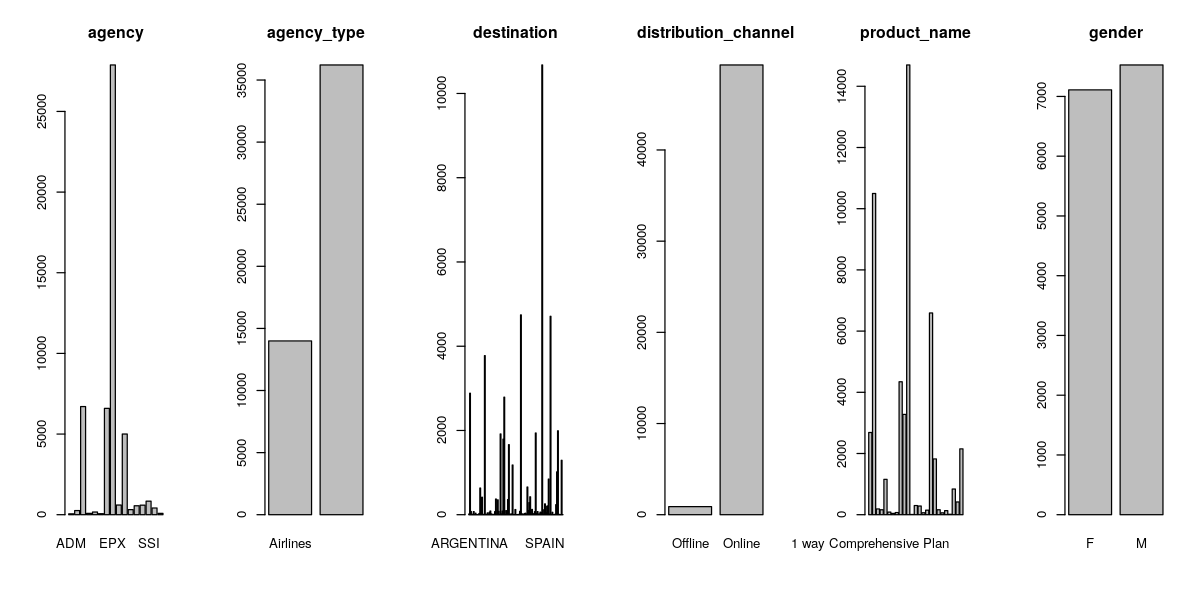

In [82]:
# Crear graficos por cada atributo categórico
# Create plots for each categorical attribute
par(mfrow = c(1, length(variables_categoricas)))
for (i in 1:length(variables_categoricas)) {
    barplot(table(df_clean[[variables_categoricas[i]]]), main = variables_categoricas[i])
}


Se observa que agency_type preferida es agencia de viajes, se prefiere canal de distribusión online. Para el resto de variables se explorará a detalle